In [5]:
import pandas as pd
import random
import sys
sys.path.append('../..')

from model import run
from model import plot_utils as pu
from model import processing
from model.amm.omnipool_amm import OmnipoolState
from model.amm.agents import Agent
from model.amm.trade_strategies import random_swaps
from model.amm.global_state import GlobalState

# same seed, same parameters = same simulation result
random.seed(42)

price_dict = {
    'HDX': 0.05,
    'USD': 1,
    'LRNA': 0.5,
    'R1': 2,
    'R2': 2/3
}

def lrna_price(asset: str):
    return price_dict['LRNA'] / price_dict[asset]

initial_state = GlobalState(
    pools={
        'omnipool': OmnipoolState(
            tokens={
                'HDX': {'liquidity': 1000000, 'LRNA_price': lrna_price('HDX')},
                'USD': {'liquidity': 1000000, 'LRNA_price': lrna_price('USD')},
                'R1': {'liquidity': 1000000, 'LRNA_price': lrna_price('R1')},
                'R2': {'liquidity': 3000000, 'LRNA_price': lrna_price('R2')},
            },
            lrna_fee=0,
            asset_fee=0
        )
    },
    agents = {
        'Trader': Agent(
            holdings={'HDX': 10000, 'USD': 1000000, 'R1': 1000000, 'R2': 3000000},
            trade_strategy=random_swaps(
                pool_id='omnipool', 
                amount={
                    'R1': 100 * lrna_price('R1'), 
                    'R2': 100  * lrna_price('R2'), 
                    'HDX': 100 * lrna_price('HDX'), 
                    'USD': 100 * lrna_price('USD')
                }
            )
        )
    }
)

events = run.run(initial_state, time_steps=5000)

events = processing.postprocessing(events)

Starting simulation...
Execution time: 15.357 seconds.


<AxesSubplot:title={'center':'pool: omnipool  lrna R2 '}>

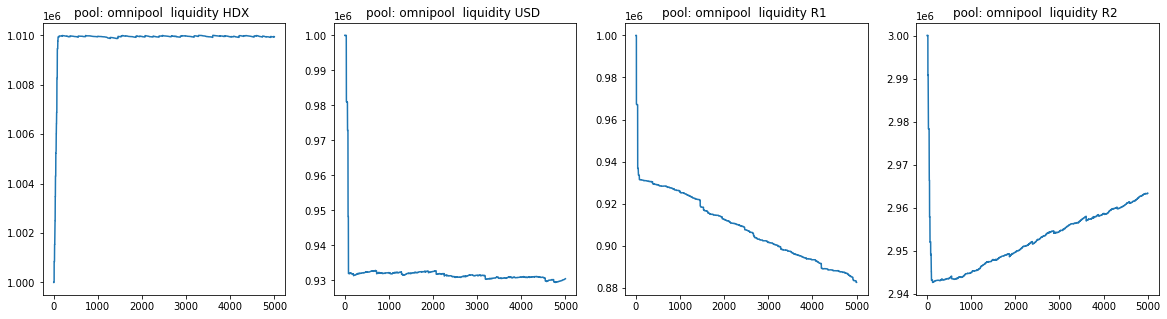

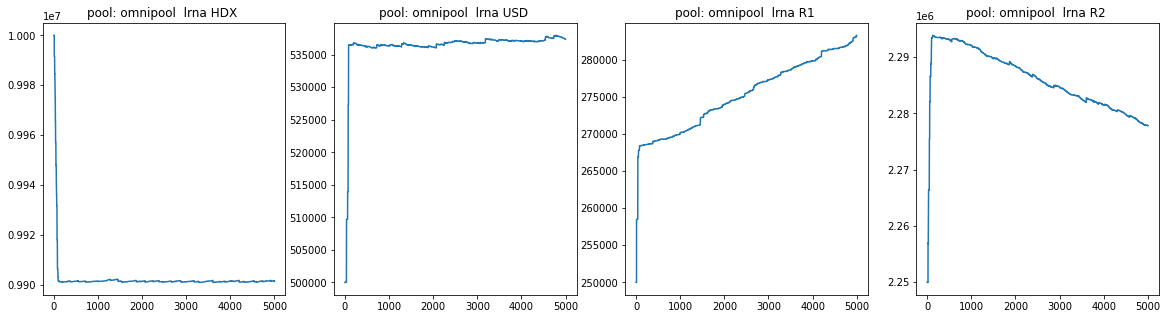

In [6]:
pu.plot(events, pool='omnipool', prop='liquidity')
pu.plot(events, pool='omnipool', prop='lrna')

<AxesSubplot:title={'center':'agent: Trader  holdings R2 '}>

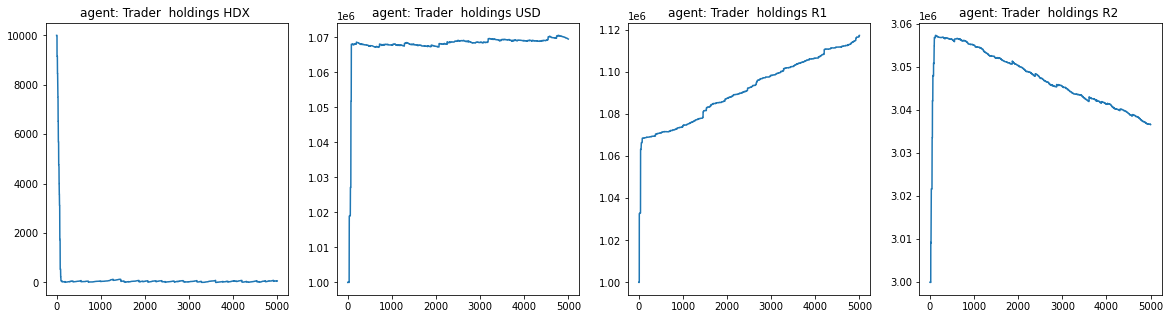

In [7]:
pu.plot(events, agent='Trader', prop='holdings')

['HDX', 'USD', 'R1', 'R2']
10000000.0
10000000.0
10000000.0
10000000.0
10000000.0
10000000.0
10000004.742322999355890859402576560192498607080362
10000004.742322999355890859402576560192498607080362
10000004.742322999355890859402576560192498607080362
10000005.32194491930191266327242356446700074952632
9991537.54565732409420318385218746997001415219536
9991542.4202486711357619727065413413900466350021501
9991542.4202486711357619727065413413900466350021501
9991542.4202486711357619727065413413900466350021501
9991542.4202486711357619727065413413900466350021501
9991548.1336041811574290859221033014714076875610688
9991548.1336041811574290859221033014714076875610688
9991568.9558455812544840126528767709368268385016428
9984567.4915054603385794322766503563108908149204047
9984567.4915054603385794322766503563108908149204047
9984567.4915054603385794322766503563108908149204047
9984606.2382217923644394248766173476101879938103735
9984606.2382217923644394248766173476101879938103735
9984612.931864020662511373